# EXERCISE: Clustering Insurance Leads with Survey Results

Consider that you’re a marketing manager at an insurance firm and that you want to customize your offerings to suit the needs of your customers. You’ve decided to try out customer profiling and segmentation. After much thought, you decide on the two factors that you think the customers would value the most. Those are:
* A savings on premium paid
* The local availability of nearby insurance agents <br><br>

The importance of these factors will be measured using something called the “likert scale”, wherein a rating of 1 represents not important and a rating of 7 represent very important. 
You conduct the survey with 150 respondents.  The survey results are in a CSV file called “Survey Results.csv”
1. How many segments would you create?
2. Describe each segment you create in terms of the input variables
3. How would you target each customer segment?


## Import the Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

## Load and Explore the Dataset

The file we'll be working with is called "Survey Results.csv"

In [2]:
df_base = pd.read_csv('../Datasets/Survey Results.csv')
df_base

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6
...,...,...
145,3,5
146,3,3
147,5,3
148,4,3


In [3]:
df_base.describe()

,Premium Savings very important,Agent Not Important
count,150.000000,150.000000
mean,4.093333,4.046667
std,1.918986,2.014500
min,1.000000,1.000000
25%,3.000000,2.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


In [4]:
for column in df_base:
    print(df_base[column].value_counts())

5    35
3    32
6    23
2    19
7    18
1    17
4     6
Name: Premium Savings very important, dtype: int64
6    36
5    26
3    23
2    22
1    22
7    14
4     7
Name: Agent Not Important, dtype: int64


## Train a Clustering Model

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6450368299887457
For n_clusters = 3 The average silhouette_score is : 0.5091672245491061
For n_clusters = 4 The average silhouette_score is : 0.4115023361984005
For n_clusters = 5 The average silhouette_score is : 0.42196418498497834
For n_clusters = 6 The average silhouette_score is : 0.44548800997192556
For n_clusters = 7 The average silhouette_score is : 0.4814792912278525


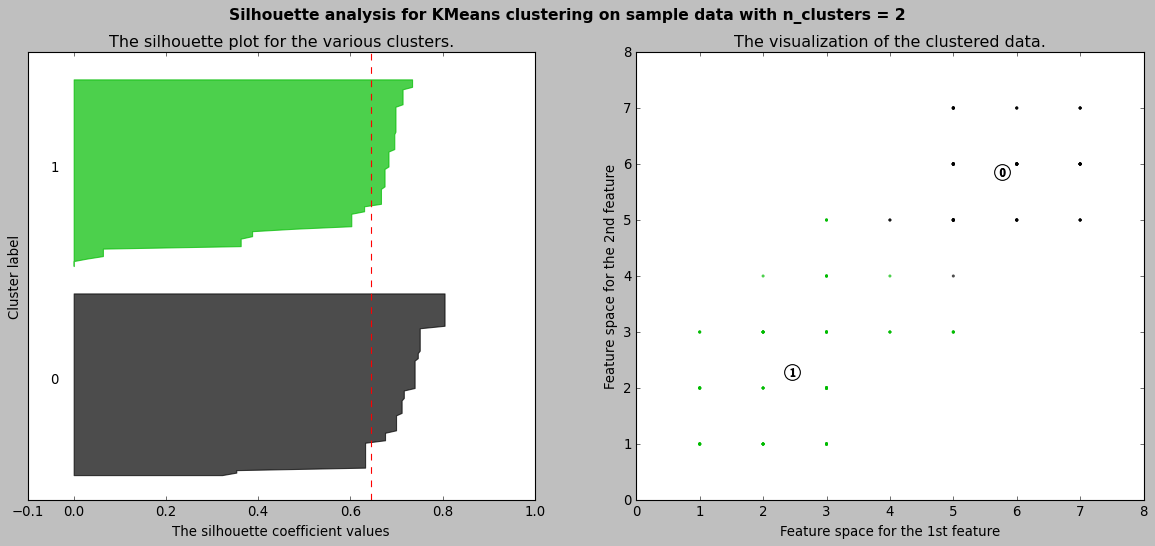

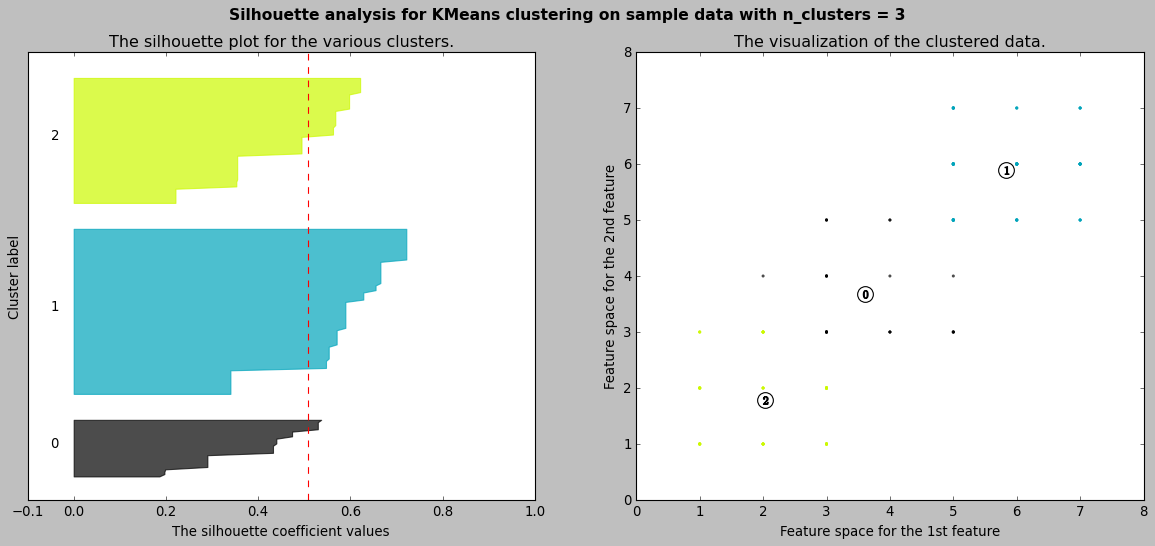

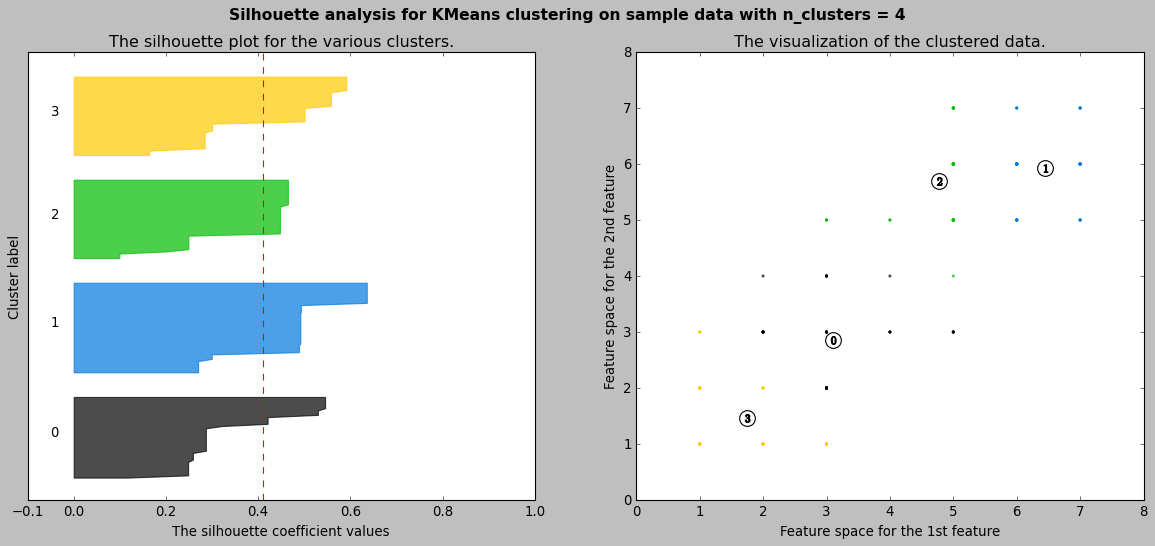

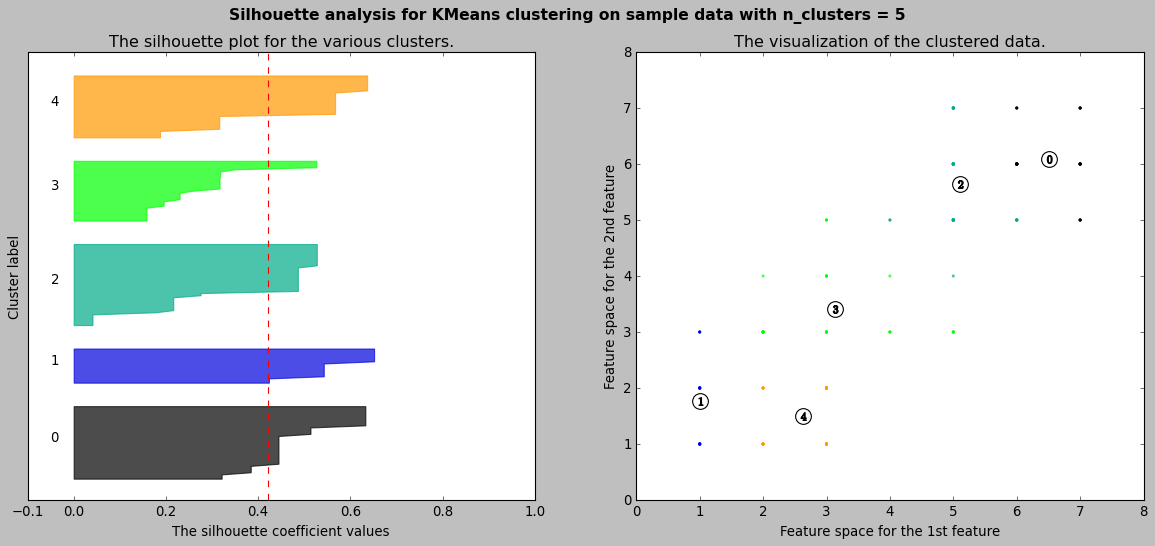

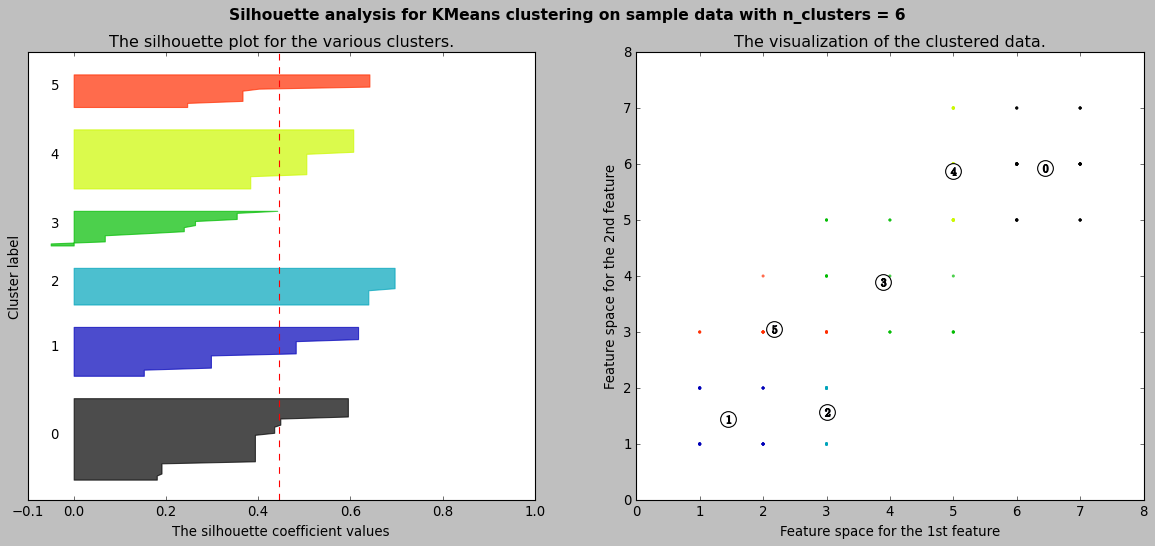

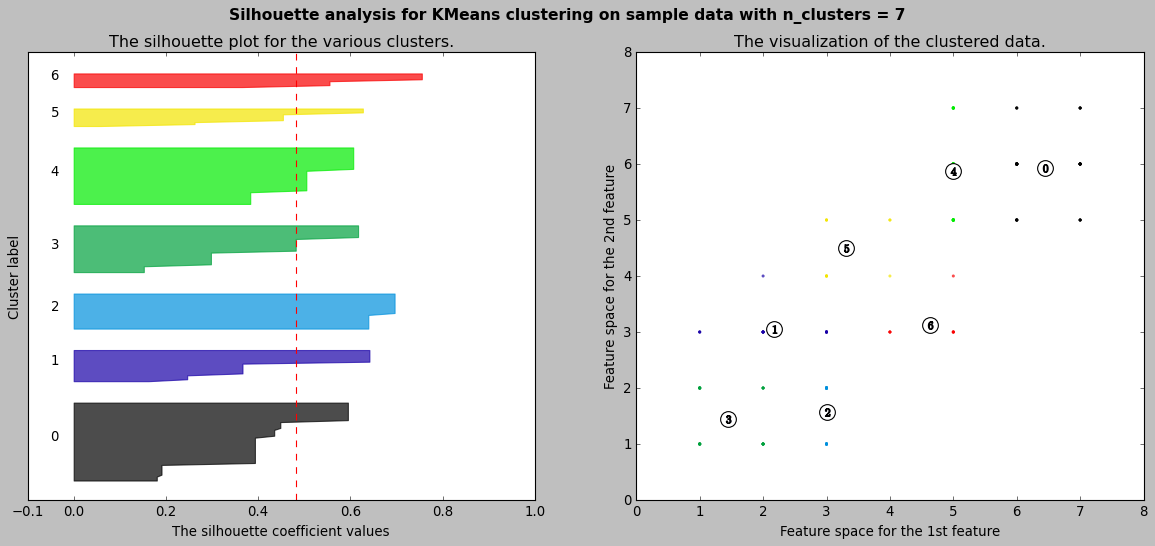

In [6]:
range_n_clusters = [2,3,4,5,6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ### --- ###
    ax1.set_ylim([0, len(df_base) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    ### --- ###
    cluster_labels = clusterer.fit_predict(df_base)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    ### --- ###
    silhouette_avg = silhouette_score(df_base, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    ### --- ###
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_base, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ### --- ### 
    ax2.scatter(df_base['Premium Savings very important'], df_base['Agent Not Important'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [7]:
model = KMeans(n_clusters=3, random_state=42)

model.fit(df_base)

KMeans(n_clusters=3, random_state=42)

In [8]:
labels = model.labels_

df_labeled = df_base.copy()
df_labeled['Label'] = labels

df_labeled.head()

,Premium Savings very important,Agent Not Important,Label
0,5,5,1
1,6,7,1
2,6,5,1
3,6,6,1
4,5,6,1


## Visualize the Results

<AxesSubplot:xlabel='Premium Savings very important', ylabel='Agent Not Important'>

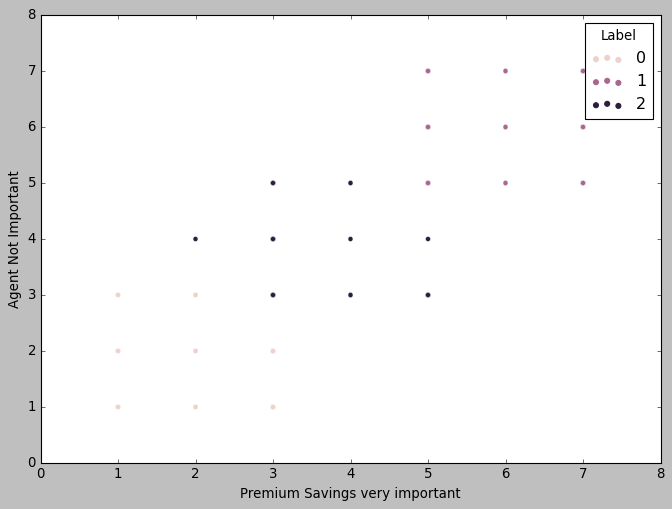

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_labeled['Premium Savings very important'], y=df_labeled['Agent Not Important'], hue=df_labeled.Label)

## Analyze the Clusters

In [10]:
df_labeled[(df_labeled.Label == 0)].describe()
#* Premium Savings is NOT Important, Agent is VERY Important

,Premium Savings very important,Agent Not Important,Label
count,54.000000,54.000000,54.0
mean,2.037037,1.777778,0.0
std,0.823315,0.743948,0.0
min,1.000000,1.000000,0.0
25%,1.000000,1.000000,0.0
50%,2.000000,2.000000,0.0
75%,3.000000,2.000000,0.0
max,3.000000,3.000000,0.0


In [11]:
df_labeled[(df_labeled.Label == 1)].describe()
#* Premium Saving is VERY Important, Agent is NOT Important

,Premium Savings very important,Agent Not Important,Label
count,71.000000,71.000000,71.0
mean,5.830986,5.901408,1.0
std,0.810395,0.700101,0.0
min,5.000000,5.000000,1.0
25%,5.000000,5.000000,1.0
50%,6.000000,6.000000,1.0
75%,6.500000,6.000000,1.0
max,7.000000,7.000000,1.0


In [12]:
df_labeled[(df_labeled.Label == 2)].describe()
#* Both AVERAGE

,Premium Savings very important,Agent Not Important,Label
count,25.000000,25.000000,25.0
mean,3.600000,3.680000,2.0
std,0.866025,0.802081,0.0
min,2.000000,3.000000,2.0
25%,3.000000,3.000000,2.0
50%,3.000000,3.000000,2.0
75%,4.000000,4.000000,2.0
max,5.000000,5.000000,2.0


## How would you target the Clusters?

# For each of the cluster
- Cluster 0 should receive a significant number of agents available to entertain their demands
- Cluster 1 should receive frequent offers of premium savings
- Cluster 2 should receive an average volume of both the premium savings offers and available agents